# ***Malwares Classification using VGG16 Architecture***

By Mohamed Shafeek T

### ***This research project also servers as the Implementation of transfer learning by using pre-trained Convolutional Neural Network (CNN) which is VGG16 architecture and fine-tuning the architecture to classify Malwares (Image-representation of malwares) belonging to 25 malware families.***

### **Requirements :**
#### **Dataset used :** 

**MalImg dataset (An open-source and one of the bench-mark malwares dataset where the malwares are already converted into images from malware binaries executable by Vision Research Lab organization).** 

#### **CNN model (A Deep Neural Network for image-related task) used :** 

**VGG16 (An architecture built by Visual Geometry Group, Department of Engineering Science, University of Oxford which was participated in ImageNet Large-Scale Visual Recognition Challenge (ILSVRC) 2014 and showed amazing performance in the classification of images beloning to 1000 classes/categories).**

#### **GPU/Accelerator used :** 

**GPU T4 x2**

In [47]:
import numpy as np
import tensorflow as tf
import os
import cv2
import time
import glob
import keras
import pandas as pd
from PIL import Image
from keras import models
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
data = os.path.join("/kaggle/input/malimg-original/malimg_paper_dataset_imgs")

In [4]:
folders = [
    "Adialer.C",
    "Agent.FYI",
    "Allaple.A",
    "Allaple.L",
    "Alueron.gen!J",
    "Autorun.K",
    "C2LOP.P",
    "C2LOP.gen!g",
    "Dialplatform.B",
    "Dontovo.A",
    "Fakerean",
    "Instantaccess",
    "Lolyda.AA1",
    "Lolyda.AA2",
    "Lolyda.AA3",
    "Lolyda.AT",
    "Malex.gen!J",
    "Obfuscator.AD",
    "Rbot!gen",
    "Skintrim.N",
    "Swizzor.gen!E",
    "Swizzor.gen!I",
    "VB.AT",
    "Wintrim.BX",
    "Yuner.A"
]

In [6]:
for folder in folders:
    sub_folder = os.path.join(data, folder)
    print(sub_folder)
    for file_ in os.listdir(sub_folder):
        img_path = os.path.join(sub_folder, file_)
        with Image.open(img_path).convert('RGB') as img:  # Convert to RGB mode which is applicable for VGG16
            img = img.resize((224, 224))
            img_array = np.array(img)
            images.append(img_array)
            labels.append(folder)

# Convert the list into arrays
gs_images = np.array(images)
gs_labels = np.array(labels)

/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Adialer.C
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Agent.FYI
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Allaple.A
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Allaple.L
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Alueron.gen!J
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Autorun.K
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/C2LOP.P
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/C2LOP.gen!g
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Dialplatform.B
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Dontovo.A
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Fakerean
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Instantaccess
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Lolyda.AA1
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Lolyda.AA2
/kaggle/input/malimg-original/malimg_paper_dataset_imgs/Lolyda

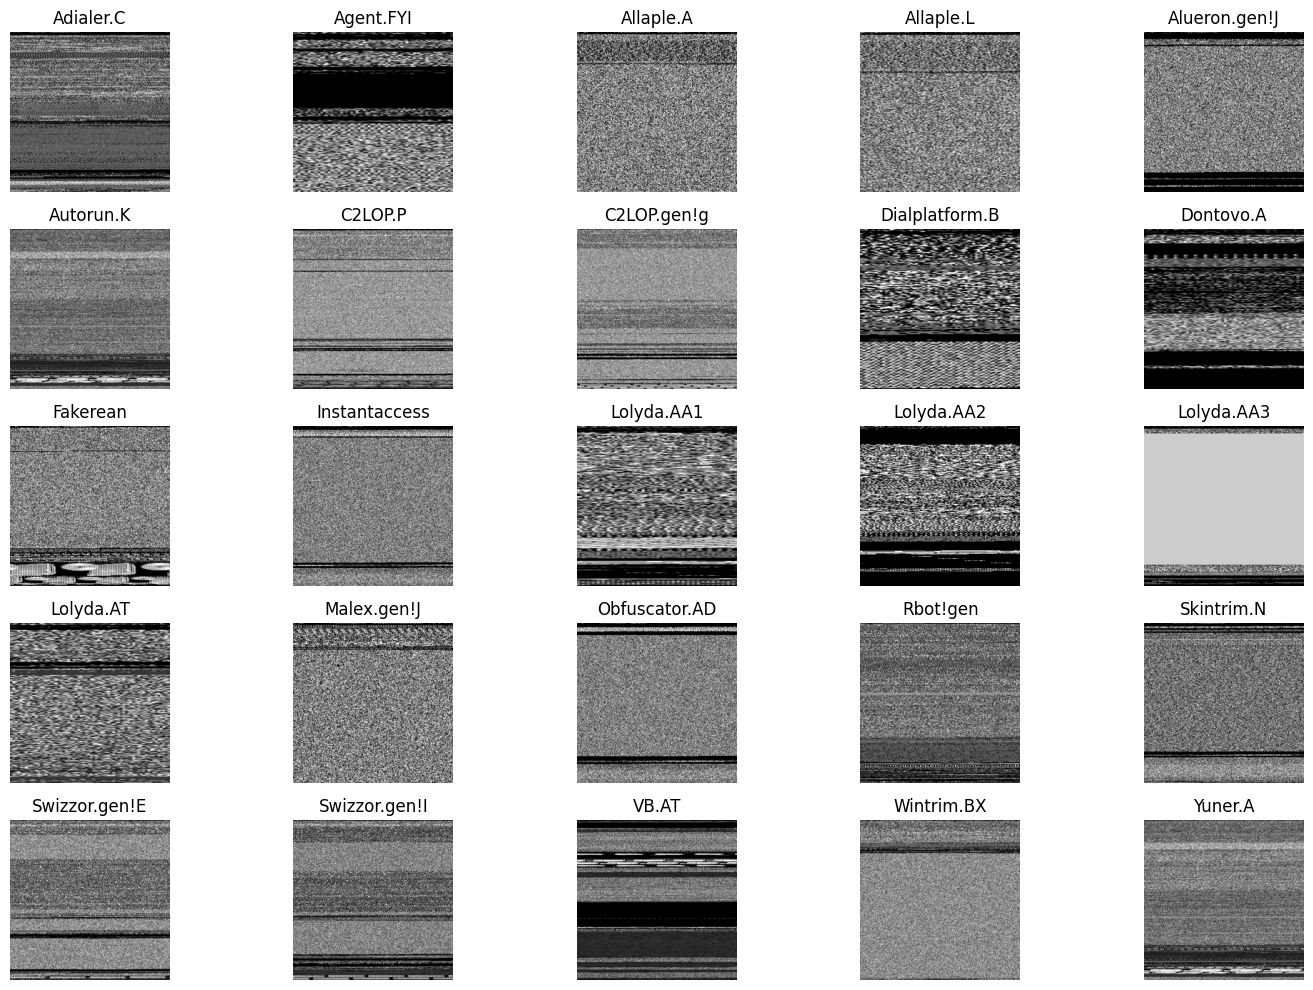

In [8]:
# Path to dataset directory
dataset_dir = "/kaggle/input/malimg-original/malimg_paper_dataset_imgs"

# Getting the list of classes (subdirectories)
classes = sorted(os.listdir(dataset_dir))

# Creating a figure to display the images
plt.figure(figsize=(15, 10))

# Looping through each class and display one image
for i, class_name in enumerate(classes):
    # Getting the list of image files in the class directory
    class_dir = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_dir)
    
    # Loading and displaying the first image from the each class
    image_path = os.path.join(class_dir, images[0])
    image = Image.open(image_path).convert("L")  # Converting to grayscale
    
    # Resizing the image to 224x224
    image = image.resize((224, 224))
    
    plt.subplot(5, 5, i+1)  # Adjusting the subplot grid as per your number of classes
    plt.imshow(image, cmap='gray')  # Specifying the colormap as 'gray'
    plt.title(class_name)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

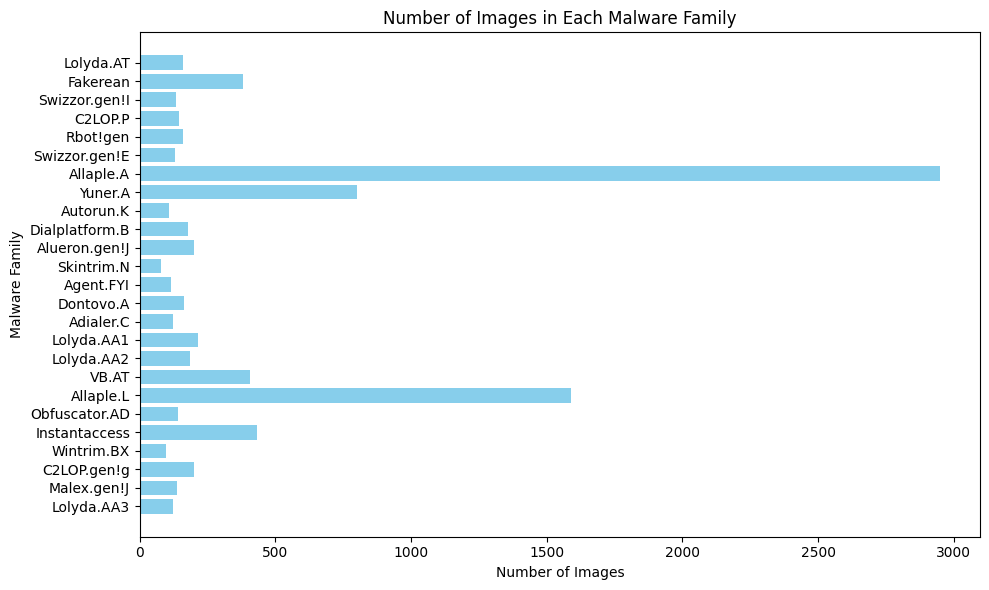

In [6]:
import os
import matplotlib.pyplot as plt

# Directory containing the malware families
malware_dir = '/kaggle/input/malimg-original/malimg_paper_dataset_imgs'

# Function to count images in each folder
def count_images(directory):
    counts = {}
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            counts[folder_name] = len(os.listdir(folder_path))
    return counts

# Counting images in each folder
malware_counts = count_images(malware_dir)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(list(malware_counts.keys()), list(malware_counts.values()), color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Malware Family')
plt.title('Number of Images in Each Malware Family')
plt.tight_layout()
plt.show()

In [7]:
# Function to count images in each folder
def count_images(directory):
    counts = {}
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            counts[folder_name] = len(os.listdir(folder_path))
    return counts

# Counting images in each folder
malware_counts = count_images(malware_dir)

# Printing the counts
for malware_family, count in malware_counts.items():
    print(f"{malware_family}: {count}")

Lolyda.AA3: 123
Malex.gen!J: 136
C2LOP.gen!g: 200
Wintrim.BX: 97
Instantaccess: 431
Obfuscator.AD: 142
Allaple.L: 1591
VB.AT: 408
Lolyda.AA2: 184
Lolyda.AA1: 213
Adialer.C: 122
Dontovo.A: 162
Agent.FYI: 116
Skintrim.N: 80
Alueron.gen!J: 198
Dialplatform.B: 177
Autorun.K: 106
Yuner.A: 800
Allaple.A: 2949
Swizzor.gen!E: 128
Rbot!gen: 158
C2LOP.P: 146
Swizzor.gen!I: 132
Fakerean: 381
Lolyda.AT: 159


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gs_images, gs_labels, test_size=0.2, random_state=42)

print ("Shape of an image in X_train: ", X_train[0].shape)
print("Training label shape:", y_train.shape)
print ("Shape of an image in X_test: ",X_test[0].shape)
print("Testing label shape:", y_test.shape)

Shape of an image in X_train:  (224, 224, 3)
Training label shape: (7471,)
Shape of an image in X_test:  (224, 224, 3)
Testing label shape: (1868,)


In [8]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(y_train)
y_gs_train_encoded = le.transform(y_train) #train labels

le.fit(y_test)
y_gs_test_encoded = le.transform(y_test) #test labels

In [9]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_gs_train_encoded)
y_test = tf.keras.utils.to_categorical(y_gs_test_encoded)

In [10]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (7471, 224, 224, 3)
y_train shape: (7471, 25)
X_test shape: (1868, 224, 224, 3)
y_test shape: (1868, 25)


In [18]:
from tensorflow.keras.applications import VGG16

def build_model(hp):
    
    model = Sequential()

    vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the weights of all layers in the VGG16 model
    for layer in vgg.layers:
        layer.trainable = False

    # Add the VGG16 model to your own model
    model.add(vgg)

    # Add the flatten layer
    model.add(Flatten())
    
    model.add(Dense(32, activation='relu'))
    
    model.add(Dense(16, activation='relu'))

    # Add the output layer
    model.add(Dense(units=25, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [ ]:
import keras_tuner
from kerastuner.tuners import RandomSearch

In [21]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Metric to optimize
    max_trials=2, # Maximum number of hyperparameter configurations to try
    directory='/kaggle/working/keras_tuner',  # Optional: Directory to store tuning results
    project_name='vgg16_malimg'
)

In [22]:
# Perform hyperparameter search (replace with your training data)
tuner.search(X_train, y_train,
             epochs=20,
             validation_data=(X_test, y_test))

Trial 1 Complete [00h 11m 43s]
val_accuracy: 0.9903640151023865

Best val_accuracy So Far: 0.9903640151023865
Total elapsed time: 00h 11m 43s


In [23]:
# Get the best model from the search results
best_model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [26]:
# best_hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [24]:
# Make predictions using the best model
y_pred = np.around(best_model.predict(X_test))

 2/59 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step 

W0000 00:00:1715240051.755028     744 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step


In [25]:
# best_model
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,518,489 (59.20 MB)

 Trainable params: 803,801 (3.07 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
# Training the model
history = best_model.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))

Epoch 1/20
  1/234 ━━━━━━━━━━━━━━━━━━━━ 9:36 2s/step - accuracy: 1.0000 - loss: 3.5352e-06

W0000 00:00:1715240194.493777     745 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9934 - loss: 0.0263

W0000 00:00:1715240223.093109     744 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.9934 - loss: 0.0263 - val_accuracy: 0.9888 - val_loss: 0.0825
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 33s 142ms/step - accuracy: 0.9974 - loss: 0.0108 - val_accuracy: 0.9877 - val_loss: 0.1053
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 34s 144ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9877 - val_loss: 0.1085
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 34s 145ms/step - accuracy: 0.9942 - loss: 0.0211 - val_accuracy: 0.9898 - val_loss: 0.0908
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9909 - val_loss: 0.0867
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 35s 148ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9829 - val_loss: 0.1955
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 35s 149ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9888 - val_loss: 0.0945
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 35s 148ms/step - accuracy: 0.9987 - loss: 0.0057 - val

In [28]:
result = best_model.evaluate(X_test,y_test)

# model loss and accuracy
print("model loss:",result[0])
print("model accuracy",result[1])

59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9893 - loss: 0.0951
model loss: 0.09898744523525238
model accuracy 0.990899384021759


In [30]:
from sklearn.metrics import classification_report

y_true = y_test  # True labels
start_time = time.time()
end_time = time.time()
print(f"Prediction time: {end_time - start_time}")

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_true, axis=1)

classes = [
    "Adialer.C",
    "Agent.FYI",
    "Allaple.A",
    "Allaple.L",
    "Alueron.gen!J",
    "Autorun.K",
    "C2LOP.P",
    "C2LOP.gen!g",
    "Dialplatform.B",
    "Dontovo.A",
    "Fakerean",
    "Instantaccess",
    "Lolyda.AA1",
    "Lolyda.AA2",
    "Lolyda.AA3",
    "Lolyda.AT",
    "Malex.gen!J",
    "Obfuscator.AD",
    "Rbot!gen",
    "Skintrim.N",
    "Swizzor.gen!E",
    "Swizzor.gen!I",
    "VB.AT",
    "Wintrim.BX",
    "Yuner.A"
]

# Generate the classification report
report_dict = classification_report(y_true_classes, y_pred_classes, target_names=classes, output_dict=True)
report = pd.DataFrame(report_dict).transpose()

print(report)

#Set the path and filename for the CSV file
file_path = "/kaggle/working/"
file_name = "VGG16_on_MalImg_report.csv"

report.to_csv(file_path + file_name)

Prediction time: 4.363059997558594e-05
                precision    recall  f1-score      support
Adialer.C        0.947368  1.000000  0.972973    36.000000
Agent.FYI        1.000000  1.000000  1.000000    19.000000
Allaple.A        1.000000  1.000000  1.000000   592.000000
Allaple.L        1.000000  1.000000  1.000000   310.000000
Alueron.gen!J    1.000000  1.000000  1.000000    45.000000
Autorun.K        1.000000  1.000000  1.000000    18.000000
C2LOP.P          0.958333  0.920000  0.938776    25.000000
C2LOP.gen!g      0.947368  1.000000  0.972973    36.000000
Dialplatform.B   1.000000  1.000000  1.000000    49.000000
Dontovo.A        1.000000  1.000000  1.000000    34.000000
Fakerean         1.000000  1.000000  1.000000    69.000000
Instantaccess    1.000000  1.000000  1.000000    89.000000
Lolyda.AA1       0.973684  1.000000  0.986667    37.000000
Lolyda.AA2       1.000000  0.975610  0.987654    41.000000
Lolyda.AA3       1.000000  1.000000  1.000000    23.000000
Lolyda.AT        

In [ ]:
# saving the cnn model
best_model.save('/kaggle/working/hp_tuned_vgg16_on_malimg.hdf5')

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

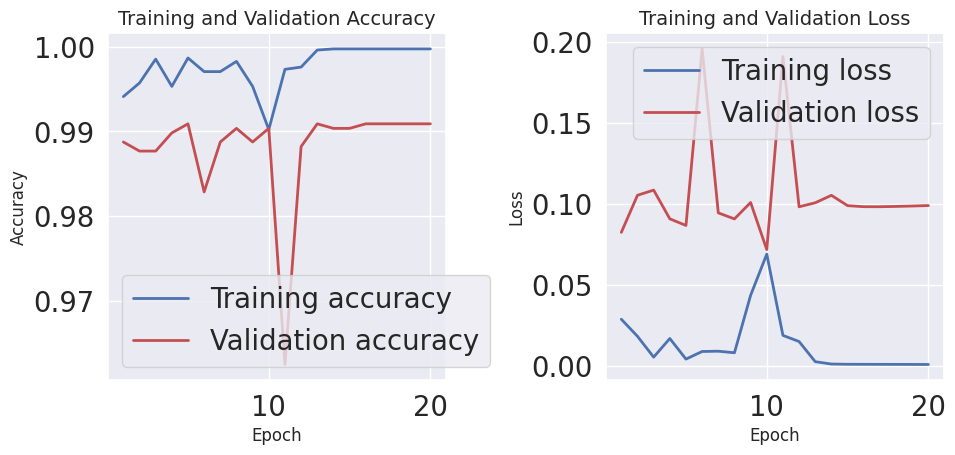

In [46]:
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(10, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss', linewidth=2)
plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

label = np.arange(25)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes, normalize = 'true')
print(conf_matrix)

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

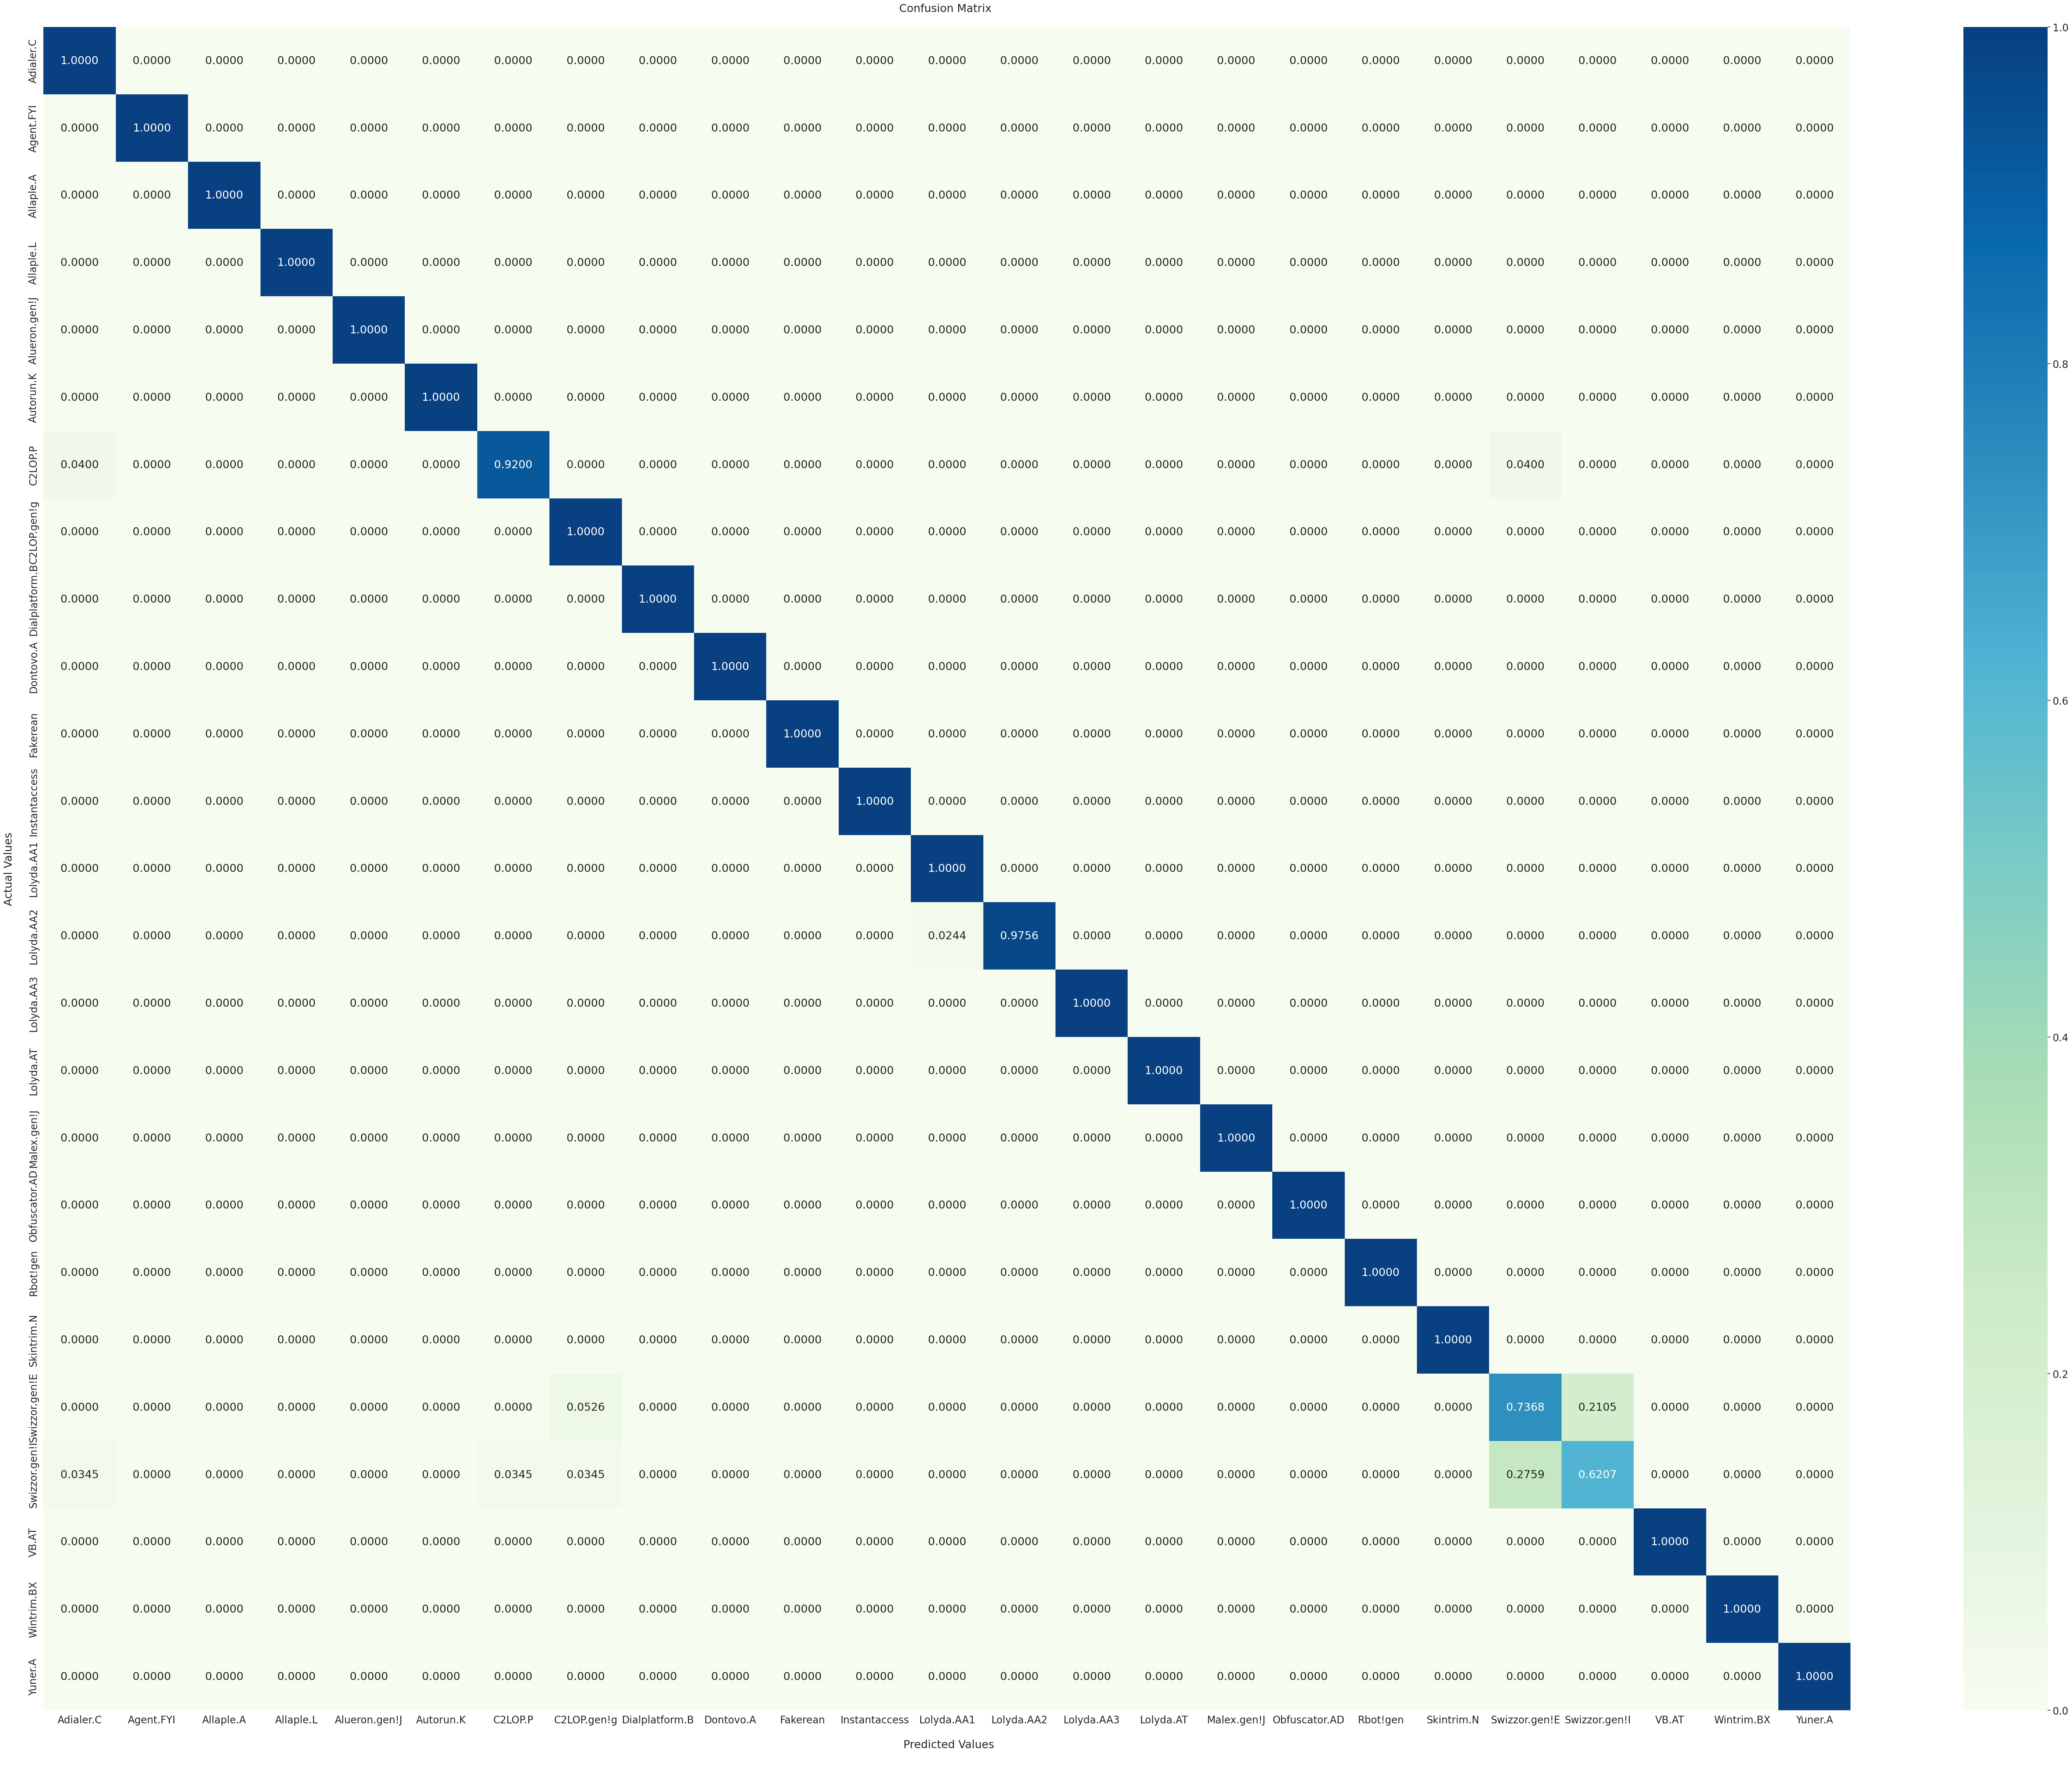

In [34]:
# Visualizing confusion matrix
import seaborn as sns

plt.figure(figsize=(80,60))
sns.set(font_scale=1.8)
fx=sns.heatmap(conf_matrix, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)

file_path = "/kaggle/working/"
file_name = "cm_of_vgg16_on_malimg.png"
plt.savefig(file_path + file_name)

plt.show()

We can clearly see that that model's classification performance (based-on the Accuracy) on the two families such as Swizzor.gen!E and Swizzor.gen!I is less when compared to it's performance on other families. From the confusion matrix we can intrepret that the model has misclassified few Swizzor.gen!E as Swizzor.gen!I and vice versa. The potential cause for this misclassification maybe either the images belonging to these two families look similar or even the images belonging to the same family look different which makes the model difficult to distinguish the features between the two families. 

**Let's now illustrate the issue by :**

* Displaying 10 random images from the families that has low accuracy (Swizzor.gen!E and Swizzor.gen!I).
* Displaying 10 random images from a family that has good accuracy (for an instance Adialer.C).

# **Displaying 10 random images from Swizzor.gen!E family**

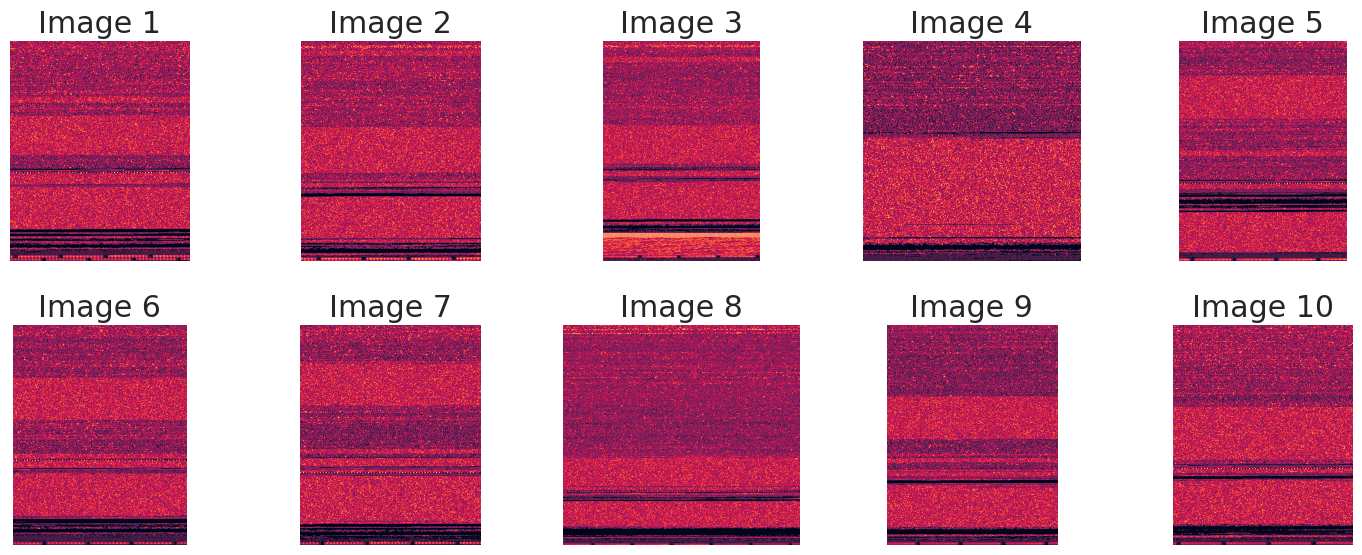

In [41]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to your directory containing malware families
directory = "/kaggle/input/malimg-original/malimg_paper_dataset_imgs"

# Malware family to display images from
malware_family = "Swizzor.gen!E"

# Path to the specific family directory
family_directory = os.path.join(directory, malware_family)

# Get list of images in the family directory
images = [file for file in os.listdir(family_directory) if file.endswith('.jpg') or file.endswith('.png')]

# Choose 10 random images from the list
random_images = random.sample(images, 10)

# Display the images
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images, 1):
    image_path = os.path.join(family_directory, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Outcome01 : Images belonging to the Swizzor.gen!E itself look different**

# **Displaying 10 random images from Swizzor.gen!I family**

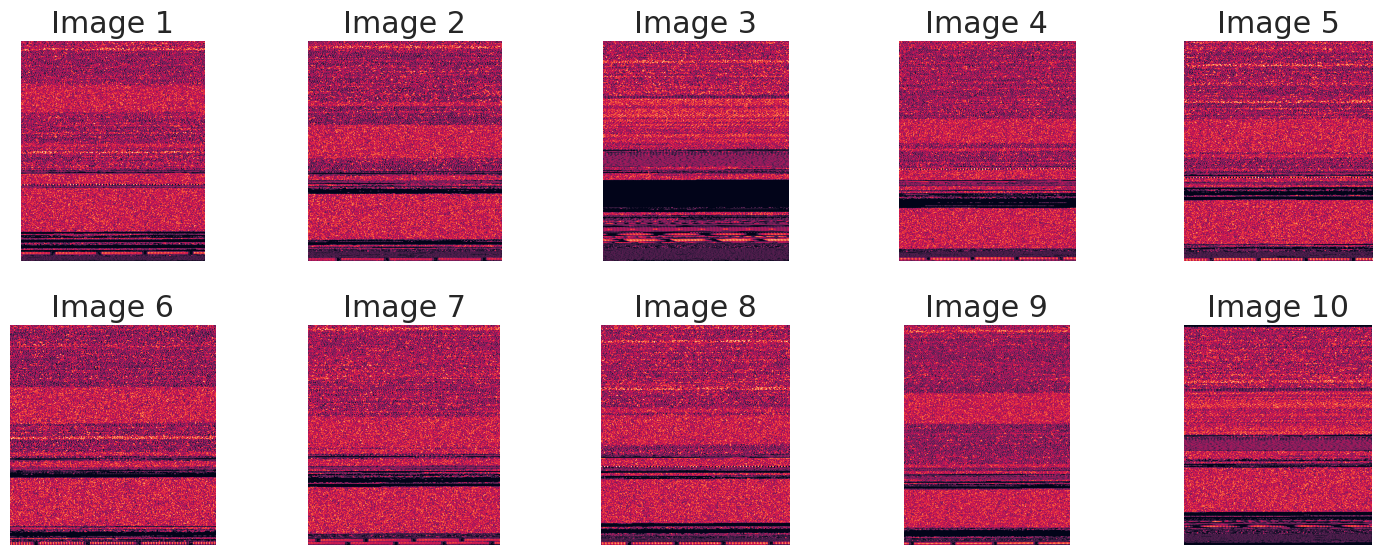

In [39]:
# Malware family to display images from
malware_family = "Swizzor.gen!I"

# Path to the specific family directory
family_directory = os.path.join(directory, malware_family)

# Get list of images in the family directory
images = [file for file in os.listdir(family_directory) if file.endswith('.jpg') or file.endswith('.png')]

# Choose 10 random images from the list
random_images = random.sample(images, 10)

# Display the images
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images, 1):
    image_path = os.path.join(family_directory, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Outcome02 : As seen in the previous family, Images belonging to the Swizzor.gen!I also look different and also some of the images in Swizzor.gen!I and Swizzor.gen!E are similar**

# **Displaying 10 random images from Adialer.C family**

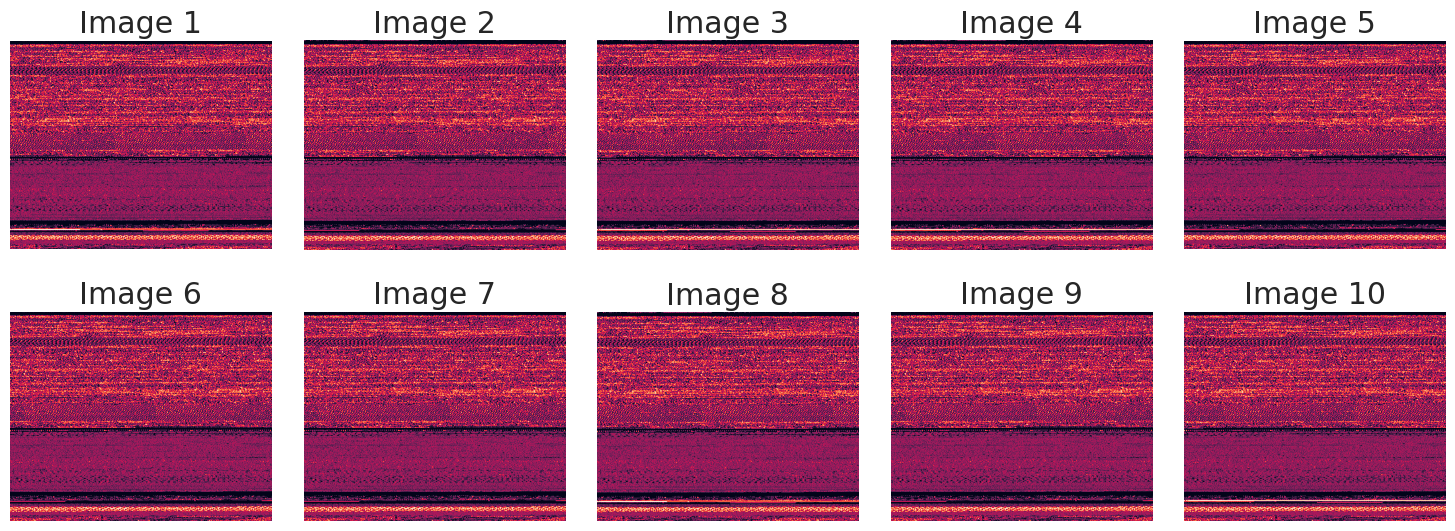

In [40]:
# Malware family to display images from
malware_family = "Adialer.C"

# Path to the specific family directory
family_directory = os.path.join(directory, malware_family)

# Get list of images in the family directory
images = [file for file in os.listdir(family_directory) if file.endswith('.jpg') or file.endswith('.png')]

# Choose 10 random images from the list
random_images = random.sample(images, 10)

# Display the images
plt.figure(figsize=(15, 6))
for i, image_name in enumerate(random_images, 1):
    image_path = os.path.join(family_directory, image_name)
    image = Image.open(image_path)
    plt.subplot(2, 5, i)
    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Outcome03 : Unlike the previous families which show low accuracy, we can precisely see that images belonging to one of families with good accuracy are the same.**

# **Conclusion :**

* ####  I have achieved the overall accuracy on the train set of 99.98% and on the test set of 99.09%.
* #### I have made use of transfer learning by using a pre-trained CNN architecture (in this case, VGG16 architecture) and fine-tuned the model for our specific task (in this case, Malware families classification).
* #### Even though i have done both Hyper-parameters tuning for finding the model with the best hyper-parameters and also actual training of the best model, the training time was drastically reduced by the usage of a pre-trained VGG16 model. This is because of the pre-trained weights that are already present in the model which act as the knowledge of the model.
* #### The faster training could not have been attained with the CNN model built from scratch as it has to learn the weights from the beginning by initializing random weights.
